<a href="https://colab.research.google.com/github/ian-mutai0/Week9-Independent-Project/blob/main/Titanic_Survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC SURVIVAL DATASET

# 1.0 Defining the Question

## a) Specifying the data analytic question

> We are required to predict whether a passenger survived or not in the Titanic dataset

## b) Defining the metric for success

> To be able to create an algorithm that can help us classify the passengers in terms of survival in the Titanic dataset

## c) Understanding the context 

> The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. Sadly, the Titanic sank on April 15, 1912, killing over 1500 people while just 705 survived. 
 
> The following are the dataset column descriptions:
 - pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 - survived - Survival (0 = No, 1 = Yes)
 - name - Name of the passenger
 - sex - Gender/sex
 - age - Age of the passenger
 - sibsp - Number of siblings/spouses aboard
 - parch - Number of parents/children aboard
 - fare - Passenger fare
 - embarked - Port of embarkation (Cherboug, Queenstown, Southampton)

## d) Recording the Experimental Design

> - Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate and bivariate analysis while recording our observations.
- Implement the solution by using the KNN classifier algorithm to predict whether a passenger survived in the Titanic crash
- Challenge the solution by giving insights on how we can optimize the model to give us a better performance
- Provide recommendations based on the performance of our models

## e) Data Relevance

> Our data is relevant considering the fact that during the event, children and passengers on the first class were given higher priority when it came to giving out of life boats. We have both these columns in our dataset which thus help us in predicting whether a person survived or not in the Titanic crash.

# 2.0 Reading the Data

In [364]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
# Loading the Data from the respective sources i.e train.csv and test.csv
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3.0 Checking the Data

> Train dataset

In [366]:
# Displaying the number of columns and rows in our train dataset
print('The shape of the train dataset is: ', titanic.shape)

The shape of the train dataset is:  (891, 12)


In [367]:
# Displaying the top of the train dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [368]:
# Displaying the bottom of the train dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [369]:
# Checking the datatypes of our columns and confirming whether they are appropriate
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [370]:
# Checking the number of unique classes in each column
# This helps in categorizing whether a column is categorical, numerical or is an object
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [371]:
# Seeing that some datatypes are objects, we can go ahead and change them to categories
numerical_variables = ['PassengerId','Age','SibSp','Parch','Fare']
objects = ['Name','Ticket','Cabin']
categorical_variables = ['Survived','Pclass','Sex','Embarked']

for i in titanic.columns:
  if i in numerical_variables:
    titanic[i] = pd.to_numeric(titanic[i])
  elif i in categorical_variables:
    titanic[i] = titanic[i].astype('category')
  else:
    titanic[i] = titanic[i].astype('object')

In [372]:
# Checking for the datatypes again
titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

> Test dataset

In [373]:
# Displaying the number of records in our test dataset
print('The shape of the test dataset is: ', test.shape)

The shape of the test dataset is:  (418, 11)


In [374]:
# Displaying the top of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [375]:
# Displaying the bottom of the dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [376]:
# Checking whether the datatypes of our dataset are appropriate
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [377]:
# Checking the number of unique classes in each column
# to categorize them into either categorical, numerical or objects
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [378]:
# Seeing that some datatypes are objects, we can go ahead and change them to categories
numerical_variables = ['PassengerId','Age','SibSp','Parch','Fare']
objects = ['Name','Ticket','Cabin']
categorical_variables = ['Survived','Pclass','Sex','Embarked']

for y in test.columns:
  if y in numerical_variables:
    test[y] = pd.to_numeric(test[y])
  elif y in categorical_variables:
    test[y] = test[y].astype('category')

In [379]:
# Checking for the datatypes again
test.dtypes

PassengerId       int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

> We realize that the test dataset does not have the 'survived' column and so when it comes to analysis and modelling, we will end up using the train dataset to create the train and test sets since it has the 'survived' label. 

# 4.0 External Data source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. Link.

### a. Validation

# 5.0 Data Cleaning

## a) Validity

In [380]:
# Dropping any unnecessary columns from the titanic dataset
titanic.drop(['PassengerId','Ticket'], axis = 1, inplace=True)

# Dropping any unnecessary columns from the test set
test.drop(['PassengerId','Ticket'], axis = 1, inplace = True)

> These two columns are to be dropped because they are distinct for every passenger and thus we can't use them in any analysis we will conduct.

## b) Accuracy

> ## c) Completeness

In [381]:
# Checking for missing values in our titanic dataset
print(titanic.isnull().sum())
print('\n')
# Checking for missing values in our test set
print("The null values in our test set")
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


The null values in our test set
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


Seeing as we have missing values in the age, cabin and embarked columns, we go ahead to deal with them. 
- Missing values in the age column can be filled using the mean so as to maintain the age distribution in our datasets. 
- Missing values in our cabin column are quite many so we can classify the cabins in terms of known or unknown so as to avoid distorting the relevance of the cabin column.
- We have 2 missing values in the Embarked column in our titanic dataset which we can fill using the mode.



> Dealing with the missing values in the Age column

In [382]:
# We will use the mean of age in both datasets
# Titanic
mean1 = titanic['Age'].mean()
titanic['Age'].fillna(mean1, inplace=True)

# Test
mean2 = test['Age'].mean()
test['Age'].fillna(mean2, inplace=True)

> Dealing with the missing values in the Cabin column

In [383]:
# We can introduce a new column, Cabin_Known in both datasets
# Titanic
titanic['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in titanic['Cabin']]

# We then drop the former Cabin column 
titanic.drop('Cabin', axis=1, inplace=True)

# Test set
test['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in test['Cabin']]

# We then drop the former Cabin column 
test.drop('Cabin', axis=1, inplace=True)

> Dealing with the missing values in the Embarked column in our Titanic dataset

In [384]:
# We use the mode
mode1 = titanic['Embarked'].mode()
titanic['Embarked'].fillna(mode1, inplace=True)

## d) Consistency

In [385]:
# Checking for duplicate values in our datasets
# Titanic
print(titanic.duplicated().sum())

# Test set
print(test.duplicated().sum())

0
0


> There are no duplicate values in both our titanic and test datasets

## e) Uniformity

In [386]:
# Changing column names to upper case and placing underscore to make the column names uniform in the titanic dataset
titanic.columns = titanic.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Test dataset
# Changing column names to upper case and placing underscore to make the column names uniform in the titanic dataset
test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

> All the column headings have been changed to lowercase for easier interpretation

## f) Checking for Outliers

In [387]:
# Checking for the outliers using quantiles
# We check fo the outliers within the numerical variables
numerical = ['age','sibsp','parch','fare']
Q1 = titanic[numerical].quantile(0.25)
Q3 = titanic[numerical].quantile(0.75)
IQR = Q3 - Q1
# Dealing with the outliers by removing outliers based on the IQR range 
new_titanic = titanic[numerical][~((titanic[numerical] < (Q1 - 1.5 * IQR)) | (titanic[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_titanic.shape)

# Printing the shape of our old dataset
print(titanic.shape)


(577, 4)
(891, 10)


> Dealing with outliers in this case would mean us not dropping them because after dropping, we realized that it would heavily impact our titanic dataset since more than 300 records and 6 columns would be dropped from our original dataset thus distorting our data. 

# 6.0 Exploratory Data Analysis

## 6.1 Univariate Data Analysis

### 6.1.1 Categorical Variables

#### i) Frequency Tables

In [388]:
# Frequency Tables
print(titanic['embarked'].value_counts())
print('\n')
print(titanic['pclass'].value_counts())
print('\n')
print(titanic['survived'].value_counts())
print('\n')
print(titanic['sex'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


3    491
1    216
2    184
Name: pclass, dtype: int64


0    549
1    342
Name: survived, dtype: int64


male      577
female    314
Name: sex, dtype: int64


> From the frequency tables, we can conclude the following observations: 
- Majority of the passengers in our passengers in our Titanic dataset, exactly 549, survived the crash while 342 passengers did not survive. 
- Majority of the passengers in our Titanic dataset were male, exactly 577 as compared to the 314 female passengers.
- Majority of the passengers embarked at the Southampton port, exactly 644 out of the total 891 passengers.
- Majority of the passengers were in the third passenger class, exactly 491 out of the total 891 passengers

#### ii) Pie charts

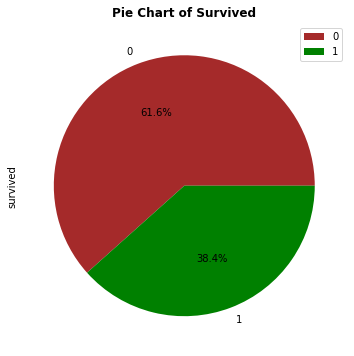

In [389]:
# Pie chart of the survival rate in our Titanic dataset
titanic['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['brown','green'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Survived', y=1, fontweight='bold')
plt.show()

> From the pie chart, we can conclude that 61.6% of the total passengers survived in our dataset while 38.4% did not.

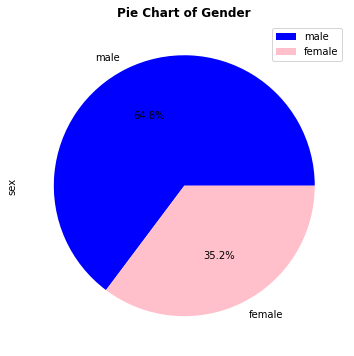

In [390]:
# Pie chart of the gender distribution
titanic['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue','pink'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Gender', y=1, fontweight='bold')
plt.show()

> From the pie chart we can tell that 64.8% of the total passengers in our dataset were male while 35.2% were female. 

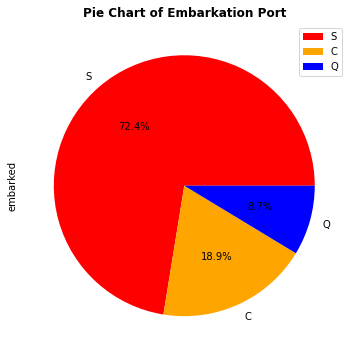

In [391]:
# Pie chart of the ports of embarkation
titanic['embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red','orange','blue'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Embarkation Port', y=1, fontweight='bold')
plt.show()

> From the pie chart we can tell that 72.4% of the total passengers embarked at the Southampton port, 18.9% at the Cherboug port and 8.7% at the Queensburg port. 

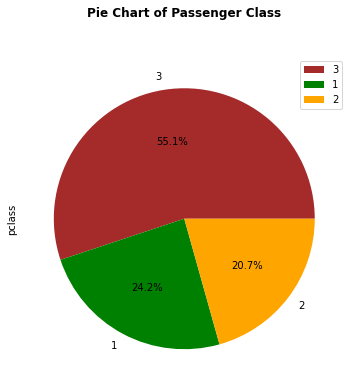

In [392]:
# Pie chart of the passenger classes
titanic['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['brown','green','orange'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Passenger Class', y=1.1, fontweight='bold')
plt.show()

> From the pie chart we can tell that 55.1% of the total passengers in our dataset were in the 3rd class, 24.2% in the 1st class and 20.7% in the 2nd class of the ship.

### 6.1.2 Numerical Variables

#### i) Measures of Central Tendency

In [393]:
# Mean 
titanic[numerical].mean()

age      29.699118
sibsp     0.523008
parch     0.381594
fare     32.204208
dtype: float64

In [394]:
# Mode
titanic[numerical].mode()

,age,sibsp,parch,fare
0,29.699118,0,0,8.05


In [395]:
# Median
titanic[numerical].median()

age      29.699118
sibsp     0.000000
parch     0.000000
fare     14.454200
dtype: float64

#### ii) Measures of Dispersion

In [396]:
# Standard Deviation
titanic[numerical].std()

age      13.002015
sibsp     1.102743
parch     0.806057
fare     49.693429
dtype: float64

In [397]:
# Variance
titanic[numerical].var()

age       169.052400
sibsp       1.216043
parch       0.649728
fare     2469.436846
dtype: float64

In [398]:
# Range
max = titanic[numerical].max()
min = titanic[numerical].min()
range = max - min
print("The range in the dataset is: ", range)

The range in the dataset is:  age       79.5800
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64


In [399]:
# Quantiles
titanic[numerical].quantile([0.25,0.5,0.75])

,age,sibsp,parch,fare
0.25,22.000000,0.0,0.0,7.9104
0.50,29.699118,0.0,0.0,14.4542
0.75,35.000000,1.0,0.0,31.0000


In [400]:
# Kurtosis
titanic[numerical].kurt()

age       0.966279
sibsp    17.880420
parch     9.778125
fare     33.398141
dtype: float64

In [401]:
# Skewness
titanic[numerical].skew()

age      0.434488
sibsp    3.695352
parch    2.749117
fare     4.787317
dtype: float64

#### iii) Visualization Techniques

> We can visualize our numerical variables using boxplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


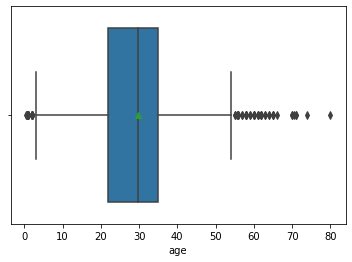

In [402]:
# Age
sns.boxplot(titanic['age'], showmeans=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


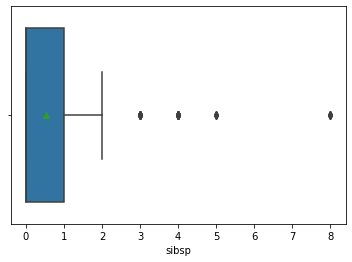

In [403]:
# Sibsp
sns.boxplot(titanic['sibsp'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


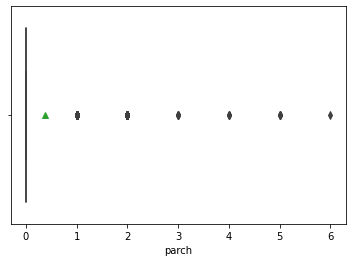

In [404]:
# Parch
sns.boxplot(titanic['parch'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


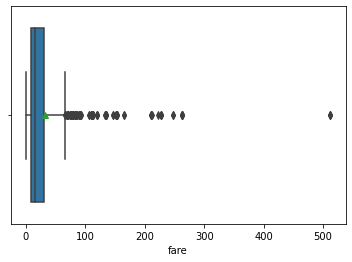

In [405]:
# Fare 
sns.boxplot(titanic['fare'], showmeans=True)

In [406]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,cabin_known
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


## 6.2 Bivariate Data Analysis

### 6.2.1 Numerical and Numerical Variables

#### i) Correlation 

In [407]:
# Correlation matrix between numerical variables
titanic[numerical].corr()

,age,sibsp,parch,fare
age,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.232625,1.000000,0.414838,0.159651
parch,-0.179191,0.414838,1.000000,0.216225
fare,0.091566,0.159651,0.216225,1.000000


# 7.0 Implementing the Solution

## Feature Engineering

> Adding a title column in the titanic dataset using the name column

In [310]:
# Lets check the unique values in our name column
titanic['name'].unique()
#print(titanic['name'].nunique())

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [311]:
# The count of the different names and titles in our dataset
titanic.name.value_counts()

Marechal, Mr. Pierre                        1
Pickard, Mr. Berk (Berk Trembisky)          1
Hendekovic, Mr. Ignjac                      1
Navratil, Mr. Michel ("Louis M Hoffman")    1
Smith, Miss. Marion Elsie                   1
                                           ..
Coutts, Master. Eden Leslie "Neville"       1
Funk, Miss. Annie Clemmer                   1
Zabour, Miss. Hileni                        1
Navratil, Master. Edmond Roger              1
Barkworth, Mr. Algernon Henry Wilson        1
Name: name, Length: 891, dtype: int64

> We can acknowledge that there are so many different names which makes sense since names are discrete values. Therefore we can distinguish between common (Mr., Mrs., Miss.) since they are the majority and the uncommon ones like Dr., Rev., etc 

In [312]:
# After viewing the data, we notice there is a name column which has quite the information
# It would be difficult to use this column since it has very many distinct names
# We can strip the names and pick common and uncommon titles
# Common titles can be such as Mr., Mrs., Miss. while uncommon like Dr.,Capt etc
titanic['title'] = titanic['name'].apply(lambda y: y.split(',')[1].strip().split(' ')[0])
titanic['title'] = [0 if y in ['Mr.', 'Mrs.', 'Miss.'] else 1 for y in titanic['title']]
titanic.drop('name', axis=1, inplace=True)

In [313]:
# Checking the count of titles in the title column
titanic['title'].value_counts()

0    824
1     67
Name: title, dtype: int64

In [314]:
# Previewing the title column
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_known,title
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0


> - 0 represents the common titles (Mr., Mrs., Miss.) 
- 1 represents the other titles such as Dr., Rev., Capt etc

## Classification Prediction using KNN

> Preview the dataset to understand the columns we will use in our modelling

In [315]:
# Previewing the titanic dataset
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_known,title
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0


> Then, we encode the categorical variables using the following approaches:
- Label Encoding the age column
- Get dummies on the embarked column

In [316]:
# Encoding the categorical columns
# Age column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])

# Get dummies on the embarked column 
dums = pd.get_dummies(titanic['embarked'], prefix="Point")
titanic = titanic.join(dums)
titanic.drop('embarked', axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin_known,title,Point_C,Point_Q,Point_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,1


> Next, we define the attributes and labels in our titanic dataset

In [317]:
# Define the attributes and labels in our titanic dataset 
X = titanic.iloc[:, 1:] #attributes
y = titanic['survived'].values #label

### i) 80-20 train and test set split

> Split the titanic dataset into train and test sets using the 80/20 split for the first instance

In [318]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling to ensure uniform evaluation of the features in our dataset

In [319]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

> Initialize the kNeighborsClassifier for training and prediction

In [320]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with the n_neighbors parameter set to 5
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

> Make predictions on the test data

In [321]:
# Making predictions
y_pred = classifier.predict(X_test)

> Evaluating the algorithm using the following metrics:
- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to help us identify the number of correct predictions

In [322]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



> To get the precise accuracy, we can use the accuracy score metric to evaluate the performance of our model

In [323]:
# Introduce the accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print("The accuracy score of our kNN classifier is: ", accuracy_score(y_test, y_pred)*100)

The accuracy score of our kNN classifier is:  81.56424581005587


> - From the accuarcy score, we can determine that the accuracy of our initial kNN classifier is 81.56% % as it made 146 out of 179 correct predictions as seen from the confusion matrix. 
- This was achieved when n_neighbors = 5 and the ratio of the train to test was 80/20. 

What happens when we use different data splits ? 

### ii) 70-30 train and test set split

> This time, split the dataset into a 70-30 split

In [324]:
# Split the data using the 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [325]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [326]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with a parameter
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [327]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

> Evaluating the algorithm using the following metrics:

- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to help us identify the number of correct predictions

In [328]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  20]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



> Evaluate the performance of the 70-30 split model using the accuracy score metric

In [329]:
from sklearn.metrics import accuracy_score
print("The accuracy score for 70-30 split: ", accuracy_score(y_test, y_pred)*100)

The accuracy score for 70-30 split:  80.22388059701493


> When we use the 70-30 split, we notice that the accuracy score reduces and in this case is 80.22% as the model made 215 out of 268 correct predictions as seen from the confusion matrix. 

### iii) 60-40 train and test set split

> For this instance, we will use the 60-40 train-test split and evaluate the performance of the model

In [330]:
# Split the data using the 60/40 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [331]:
# We will use the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [332]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with a parameter
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [333]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

> Evaluating the algorithm using the following metrics:

- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to help us identify the number of correct predictions

In [334]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188  28]
 [ 42  99]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       216
           1       0.78      0.70      0.74       141

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357



> Evaluate the performance of the 60-40 split model using the accuracy score

In [335]:
# Import accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print("The accuarcy score of the 60-40 split model is ", accuracy_score(y_test, y_pred)*100)

The accuarcy score of the 60-40 split model is  80.3921568627451


> In the instance of a 60-40 split, the accuracy score remains to be 80% as the model made 287 out of 357 correct predictions as seen from the confusion matrix.

## Findings

> - The highest accuracy score of 81.56% was achieved with the 80-20 train-test split when the n_neighbors parameter of the kNN Classifier model was set to 5.
- Reducing the train-test split ratio resulted to lower accuracy as compared to the initial 80-20 split model.

# 8.0 Challenging the Solution

- We can challenge our solution by implementing dimensionality reduction techniques such as LDA and PCA as a way of optimization and compare the performances of our models
- We can also challenge our solution by using the Grid Search to find the best parameters that would give us the highest accuracy score while working with this dataset

## a) Linear Discriminant Analysis

> Define the dependent and independent variables

In [336]:
# Define the attributes and labels in our titanic dataset 
X = titanic.iloc[:, 1:] #attributes
y = titanic['survived'].values #label

> We will use the 80-20 split to compare the performance of our classifiers after performing dimensionality reduction

In [337]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling for LDA

In [338]:
# We will use the StandardScaler for LDA 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

> Import the LDA class from the sklearn library and specify the number of components to 1 so as to evaluate the performance of our classifier with a single linear discriminant

In [339]:
# Import the LDA class from the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

> Introduce our kNN classifier and fit the model with the train data

In [340]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with a parameter
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

> Make predictions on the test data

In [341]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

> Evaluate the performance of our kNN classifier after performing Linear Discriminant Analysis

In [342]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



> Evaluate the performance using an accuracy score metric

In [343]:
# Import the accuracy score from the sklearn metrics library 
from sklearn.metrics import accuracy_score
print("The accuracy score of our new LDA performed model is: ", accuracy_score(y_test, y_pred))

The accuracy score of our new LDA performed model is:  0.7988826815642458


> From the classification report, we can determine that the accuracy of our kNN classifier after using the LDA dimensionality reduction technique reduced to 79.88% as compared to the initial 81.56% accuracy score considering it made 143 out of 179 correct predictions as seen from the confusion matrix. This was also achieved when using the 80-20 train-test split with the n_neighbors parameter still set as 5

### Findings

> After performing the LDA dimensionality reduction technique on our data when the train-test split is 80-20, we realize that the accuracy score reduces from 82% to 80% which means that for us to achieve a higher prediction accuracy score, we need to include all features of our dataset rather than use a single linear discriminant. 

## b) Principal Component Analysis

After further research, we realize that PCA is more suited for datasets which have many outliers as is so with our Titanic dataset. Therefore we can go ahead and implement then compare its performance to our previous models. 

> Define the dependent and independent variables

In [344]:
# Define the attributes and labels in our titanic dataset 
X = titanic.iloc[:, 1:] #attributes
y = titanic['survived'].values #label

> We will use the 80-20 split to compare the performance of our classifiers after performing dimensionality reduction

In [345]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling for PCA

In [346]:
# We will use the StandardScaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

> Import the PCA class from the sklearn decomposition library and specify the number of components so as to evaluate the performance of our classifier with different numbers of principal components

In [347]:
# Import the PCA class from the sklearn library
from sklearn.decomposition import PCA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant
pca = PCA(n_components=4) # 1 - 72%, 2 - 77%, 3 - 79%, 4 - 82% 
X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)

> Introduce our kNN classifier and fit the model with the train data

In [348]:
from sklearn.neighbors import KNeighborsClassifier #class
classifier = KNeighborsClassifier(n_neighbors=5) #initializing the class with a parameter
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

> Making predictions on the test data

In [349]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

> Evaluate the performance of our kNN classifier after performing Principal Component Analysis

In [350]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



> Evaluate the performance of our classifier using the accuracy score metric

In [351]:
# Import accuracy score from the metrics library
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8156424581005587


### Findings 

> After trying out different numbers of principal components, we achieved an accuracy score of 81.56% which is similar to the accuracy score of the initial 80-20 split kNN classifier model after setting the number of components to 4. 

## c) GridSearch for the best parameters

> First we can find the cross validation score so as to estimate the best accuracy score after using 10 folds

In [354]:
# Define the attributes and labels in our titanic dataset 
X = titanic.iloc[:, 1:] #attributes
y = titanic['survived'].values #label

In [355]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [356]:
# We will use the StandardScaler for cross validation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [357]:
# Import the cross validation score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 80.48 %


Using cross validation, we can determine that the best accuracy that can be achieved using 10 test folds is 80.48%  

> Applying Grid Search to find the best model and the best parameters to give us the highest accuracy score.

In [360]:
# Define the attributes and labels in our titanic dataset 
X = titanic.iloc[:, 1:] #attributes
y = titanic['survived'].values #label

In [361]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
# We will use the StandardScaler for the GridSearch
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
# Applying Grid Search to find the best model and the best parameters
# Import the GridSearchCV class from the library
from sklearn.model_selection import GridSearchCV
 
# Create a list of parameters that our GridSearch object will analyze, select and produce the best accuracy score with 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]
# Finding the accuracy on the 10 test folds
# The n_jobs is to set all your process to run the grid search by using the whole computing power
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv = 10, n_jobs = -1)

# We then fit the grid search object to our train data
grid_search.fit(X_train, y_train)

# Best accuracy score 
best_accuracy = grid_search.best_score_

# Best parameters that will help us achieve the best accuracy 
best_parameters = grid_search.best_params_

print("Accuracy after using 10 test folds to find the best accuracy and best parameters")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy after using 10 test folds to find the best accuracy and best parameters
Best Accuracy: 82.03 %
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}


### Findings

> - This is very interesting since our GridSearch model has given us 82.03% as its best accuracy score. 
- The GridSearch model also gave us its best parameters as ; n_neighbors = 10 and the distance metric = minkowski. 

# 9.0 Recommendations

> For us to achieve the highest prediction accuracy score of 82.03% as predicted by our GridSearch model, I would recommend that:
- We split the data using 80-20 ratio for the train and test sets 
- Set the number of neighbors(n_neighbors) to 10 as a parameter in our kNN classifier
- Set the distance metric to minkowski as a parameter in our kNN classifier

# 10.0 Follow up questions

## a) Did we have the right data? 

> I believe we had the right data because passenger data such as the age, passenger class and the gender would be essential in helping us predict whether a passenger survived or not in our Titanic dataset. 

## b) Do we need other data to answer our question?

> I believe the data we had sufficient to help us predict whether a passenger survived or not in our dataset. 

## c) Did we have the right question?

> Yes we did considering in our Titanic dataset, we already had the output class label 'Survived' which would be our target variable in modelling while the rest of the columns would actually be our feature variables and assist us in making predictions. 

> 